In [1]:
%matplotlib inline

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<a href="https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/postprocessing/vis_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Visualizing inside LSTM


In [2]:

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from ai4water.functional import Model
from ai4water.models import LSTM
from ai4water.datasets import busan_beach
from ai4water.utils.utils import get_version_info
from ai4water.postprocessing import Visualize


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:


for k,v in get_version_info().items():
    print(f"{k} version: {v}")
    

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [4]:
data = busan_beach()
print(data.shape)

(1446, 14)


In [5]:
input_features = data.columns.tolist()[0:-1]
output_features = data.columns.tolist()[-1:]

In [6]:
lookback = 14

In [7]:
model = Model(
    model=LSTM(
        units=13,
        input_shape=(lookback, len(input_features)),
        dropout=0.2
    ),
    input_features=input_features,
    output_features=output_features,
    ts_args={'lookback':lookback},
    epochs=100
)


            building DL model for  
            regression problem using Model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 14, 13)]          0         
                                                                 
 LSTM_0 (LSTM)               (None, 13)                1404      
                                                                 
 Dropout (Dropout)           (None, 13)                0         
                                                                 
 Flatten (Flatten)           (None, 13)                0         
                                                                 
 Dense_out (Dense)           (None, 1)                 14        
                                                                 
Total params: 1,418
Trainable params: 1,418
Non-trainable params: 0
_____________________________________________


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 14, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 14, 13)
target shape:  (31, 1)
Train on 121 samples, validate on 31 samples
Epoch 1/100
121/121 [==============================] - 0s 3ms/sample - loss: 752808851608330.6250 - val_loss: 10488966144.0000
Epoch 2/100
121/121 [==============================] - 0s 141us/sample - loss: 752799654470241.2500 - val_loss: 10436578304.0000
Epoch 3/100
121/121 [==============================] - 0s 83us/sample - loss: 752733421487840.2500 - val_loss: 10572704768.0000
Epoch 4/100
121/121 [==============================] - 0s 132us/sample - loss: 752740284339767.0000 - val_loss: 10431489024.0000
Epoch 5/100
121/121 [==============================] - 0s 124us/sample - loss: 752729785407572.6250 - val_loss: 10312578048.0000
Epoch 6/100
121/121 [==================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Epoch 8/100
121/121 [==============================] - 0s 124us/sample - loss: 752704210829582.8750 - val_loss: 10136607744.0000
Epoch 9/100
121/121 [==============================] - 0s 132us/sample - loss: 752710126306092.5000 - val_loss: 10098843648.0000
Epoch 10/100
121/121 [==============================] - 0s 124us/sample - loss: 752769011509163.3750 - val_loss: 10049088512.0000
Epoch 11/100
121/121 [==============================] - 0s 91us/sample - loss: 752757978409823.2500 - val_loss: 10234416128.0000
Epoch 12/100
121/121 [==============================] - 0s 83us/sample - loss: 752708875172940.2500 - val_loss: 10217053184.0000
Epoch 13/100
121/121 [==============================] - 0s 91us/sample - loss: 752705627603079.3750 - val_loss: 10082214912.0000
Epoch 14/100
121/121 [==============================] - 0s 132us/sample - loss: 752669739335544.6250 - val_loss: 9811524608.0000
Epoch 15/100
121/121 [==============================] - 0s 132us/sample - loss: 752674242284857.

121/121 [==============================] - 0s 91us/sample - loss: 710573745200948.8750 - val_loss: 50736712908800.0000
Epoch 72/100
121/121 [==============================] - 0s 91us/sample - loss: 736041725925189.7500 - val_loss: 45571217817600.0000
Epoch 73/100
121/121 [==============================] - 0s 91us/sample - loss: 718597931479209.2500 - val_loss: 46810152304640.0000
Epoch 74/100
121/121 [==============================] - 0s 91us/sample - loss: 717560062012119.7500 - val_loss: 47032974704640.0000
Epoch 75/100
121/121 [==============================] - 0s 91us/sample - loss: 711767566412774.5000 - val_loss: 42235647229952.0000
Epoch 76/100
121/121 [==============================] - 0s 91us/sample - loss: 721031219785355.6250 - val_loss: 39964234481664.0000
Epoch 77/100
121/121 [==============================] - 0s 91us/sample - loss: 730650694303337.8750 - val_loss: 13622182936576.0000
Epoch 78/100
121/121 [==============================] - 0s 83us/sample - loss: 7410111479

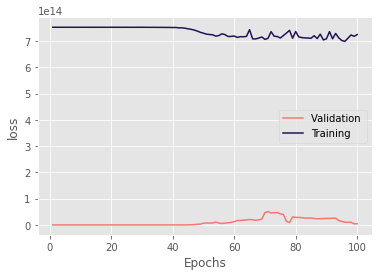

********** Successfully loaded weights from weights_039_4863798272.00000.hdf5 file **********


In [8]:
h = model.fit(data=data)

In [9]:
visualizer = Visualize(model, verbosity=0)

## gradients




********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 14, 13)
target shape:  (121, 1)


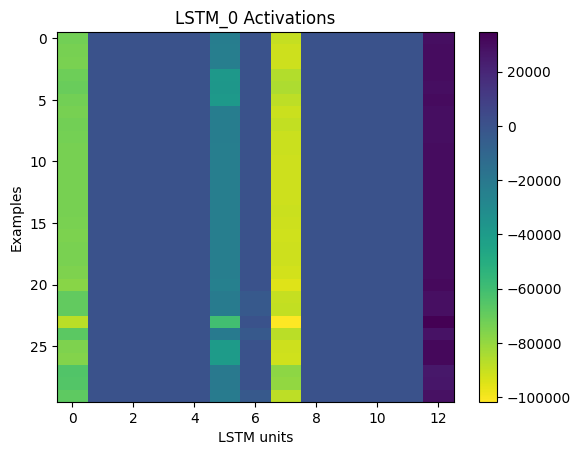

In [10]:
_ = visualizer.activations(layer_names="LSTM_0", data=data, examples_to_use=range(20, 50))

## gradients of activations




********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 14, 13)
target shape:  (121, 1)


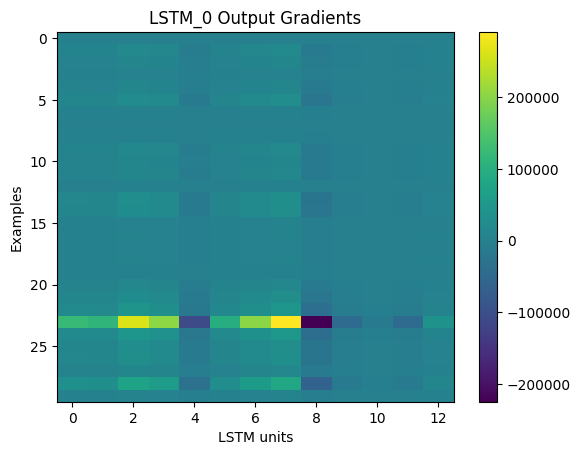

In [11]:
_ = visualizer.activation_gradients("LSTM_0", data=data, examples_to_use=range(20, 50))

In [12]:
x, y = model.all_data(data=data)
x.shape, y.shape


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 14, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 14, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 14, 13)
target shape:  (66, 1)


((218, 14, 13), (218, 1))

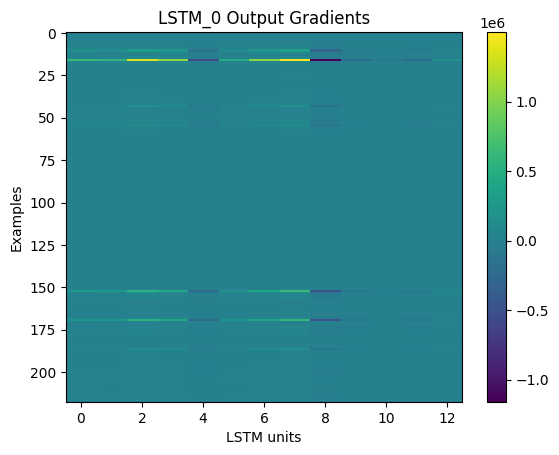

In [13]:
_ = visualizer.activation_gradients("LSTM_0", x=x, y=y)

## weights



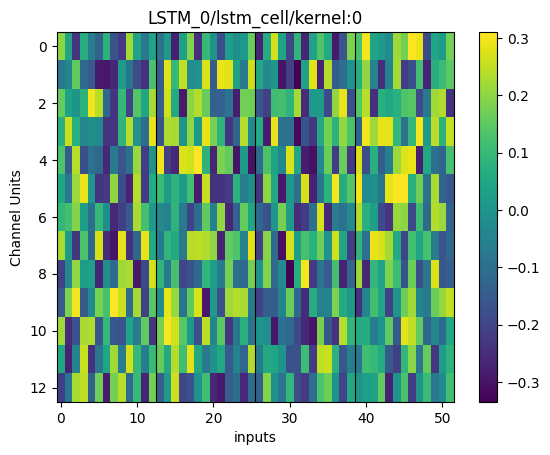

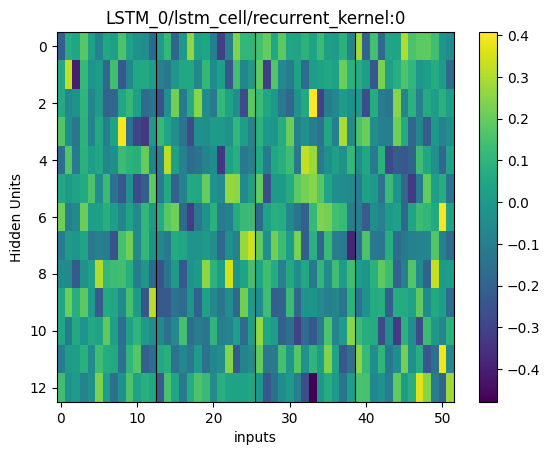

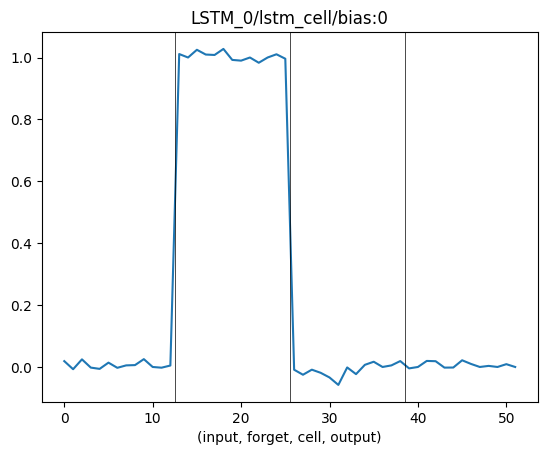

In [14]:
_ = visualizer.weights(layer_names="LSTM_0", data=data)

## gradients of weights




********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 14, 13)
target shape:  (121, 1)


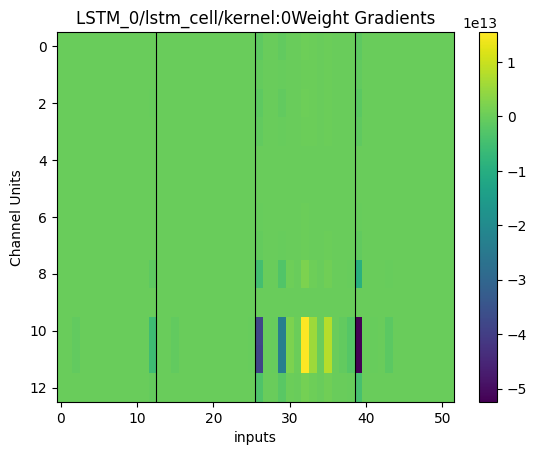

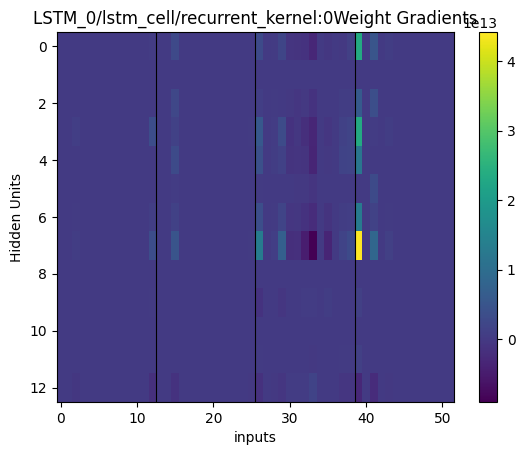

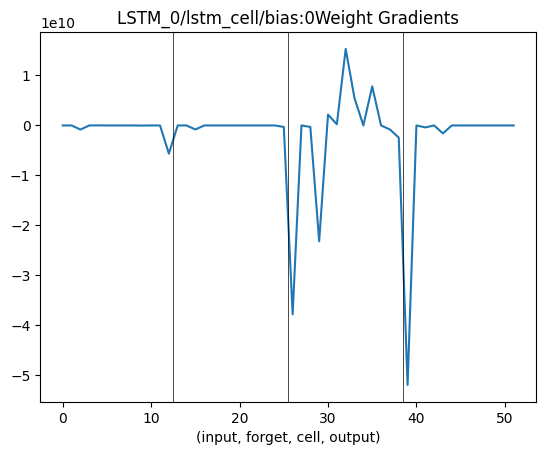

In [15]:
_ = visualizer.weight_gradients(layer_names="LSTM_0", data=data)